In [2]:
import tensorflow as tf
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt

%matplotlib inline

In [3]:
def Data_Process():
    
    # Read the Dataset
    df = pd.concat(map(pd.read_csv, ["1_label.csv","2_label.csv","3_label.csv","4_label.csv","5_label.csv","6_label.csv","7_label.csv","8_label.csv","9_label.csv"]))

    col_norm =['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','mag_x','mag_y','mag_z']
    
    # Normalization using Custom Lambda Function
    
    df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )
    
    X_Data = df1_norm
    Y_Data = df["label"]
    
    X_Data.head(20)
    Y_Data.head(20)

    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)
    
    return X_Train, X_Test, Y_Train, Y_Test

In [4]:
def create_feature_column():
    
    feat_acc_x = tf.feature_column.numeric_column('acc_x')
    
    feat_acc_y = tf.feature_column.numeric_column('acc_y')
    
    feat_acc_z = tf.feature_column.numeric_column('acc_z')
    
    feat_gyr_x = tf.feature_column.numeric_column('gyr_x')
    
    feat_gyr_y = tf.feature_column.numeric_column('gyr_y')
    
    feat_gyr_z = tf.feature_column.numeric_column('gyr_z')
    
    feat_mag_x  = tf.feature_column.numeric_column('mag_x')
    
    feat_mag_y  = tf.feature_column.numeric_column('mag_y')
    
    feat_mag_z  = tf.feature_column.numeric_column('mag_z')
    
    feature_column = [feat_acc_x,feat_acc_y,feat_acc_z,feat_gyr_x,feat_gyr_y,feat_gyr_z,feat_mag_x,feat_mag_y,feat_mag_z  ] 
    
    return feature_column

In [5]:
X_Train, X_Test, Y_Train, Y_Test = Data_Process()
feature_column = create_feature_column()



input_func = tf.estimator.inputs.pandas_input_fn(X_Train, 
                                                 Y_Train,
                                                 batch_size=550,
                                                 num_epochs=1000,
                                                 shuffle=True)

eval_func = tf.estimator.inputs.pandas_input_fn(X_Test,
                                               Y_Test,
                                               batch_size=550,
                                               num_epochs=1,
                                               shuffle=False)
predict_input_fn = tf.estimator.inputs.pandas_input_fn(
      x=X_Test,
      num_epochs=1,
      shuffle=False)

In [6]:
dnnmodel = tf.estimator.DNNClassifier(
                                        hidden_units = [200,200],
                                        feature_columns = feature_column,
                                        n_classes=20,
                                        activation_fn=tf.nn.softmax,
                                        dropout=None,
                                        optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
                                    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SOMEYA~1\\AppData\\Local\\Temp\\tmpgbmc9rbe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022BF7A84308>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [7]:
history = dnnmodel.train(input_fn=input_func, 
               steps=500)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SOMEYA~1\AppData\Local\Temp\tmpgbmc9rbe\model.

INFO:tensorflow:global_step/sec: 40.7113
INFO:tensorflow:loss = 847.545, step = 201 (2.439 sec)
INFO:tensorflow:global_step/sec: 60.958
INFO:tensorflow:loss = 834.238, step = 301 (1.640 sec)
INFO:tensorflow:global_step/sec: 51.625
INFO:tensorflow:loss = 748.97, step = 401 (1.935 sec)
INFO:tensorflow:Saving checkpoints for 500 into C:\Users\SOMEYA~1\AppData\Local\Temp\tmpgbmc9rbe\model.ckpt.
INFO:tensorflow:Loss for final step: 720.7183.


In [8]:
dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-09-02T23:20:47Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\SOMEYA~1\AppData\Local\Temp\tmpgbmc9rbe\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-09-02-23:21:46
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.4881807, average_loss = 1.3052274, global_step = 500, loss = 717.8174
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: C:\Users\SOMEYA~1\AppData\Local\Temp\tmpgbmc9rbe\model.ckpt-500


{'accuracy': 0.4881807,
 'average_loss': 1.3052274,
 'loss': 717.8174,
 'global_step': 500}

In [9]:
predictions = list(dnnmodel.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test,prediction)
conmat = confusion_matrix(Y_Test,prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SOMEYA~1\AppData\Local\Temp\tmpgbmc9rbe\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


C:\Users\SOMEYA KUMARI SHARMA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

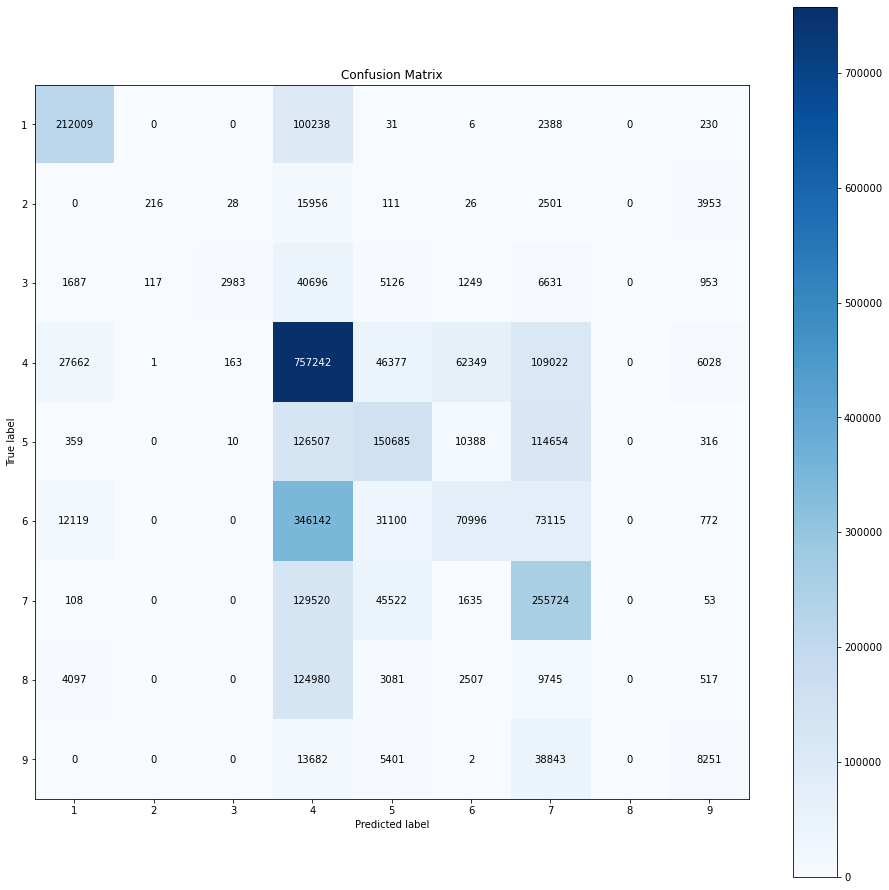

In [12]:
skplt.metrics.plot_confusion_matrix(Y_Test, 
                                    prediction,
                                   figsize=(16,16),
                                   title="Confusion Matrix")

In [13]:
print(data)

              precision    recall  f1-score   support

           1       0.82      0.67      0.74    314902
           2       0.65      0.01      0.02     22791
           3       0.94      0.05      0.10     59442
           4       0.46      0.75      0.57   1008844
           5       0.52      0.37      0.44    402919
           6       0.48      0.13      0.21    534244
           7       0.42      0.59      0.49    432562
           8       0.00      0.00      0.00    144927
           9       0.39      0.12      0.19     66179

    accuracy                           0.49   2986810
   macro avg       0.52      0.30      0.31   2986810
weighted avg       0.49      0.49      0.44   2986810

